# Nota

O objetivo deste notebook é ler um arquivo CSV e plotar a curva normal para que se faça a nálise das notas da turma.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

In [3]:
# --- Passo 1: Criar um arquivo CSV de exemplo (se não existir) ---
# Você pode pular esta parte e usar seu próprio arquivo CSV.
# Apenas garanta que ele tenha uma coluna com o nome 'Nota'.
try:
    with open('p1.csv', 'x', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Nome', 'Nota'])
        # Adicionando notas de exemplo com uma certa distribuição
        notas_exemplo = [
            12.30,
            67.68,
            36.90,
            55.36,
            30.75,
            36.92,
            55.36,
            55.36,
            61.51,
            30.75,
            12.30,
            24.63,
            30.77,
            49.23,
            12.30,
            24.60,
            36.92,
            18.48,
            36.90,
            12.32,
            49.21,
            67.70,
            18.47,
            67.69,
            36.93,
            67.69,
            36.93,
            67.69,
            55.39,
            12.30,
            61.53,
            30.76,
            49.22,
            43.08,
            30.77,
            43.07,
            18.45,
            36.90,
            36.92,
            18.45
        ]
        for i, nota in enumerate(notas_exemplo):
            writer.writerow([f'Aluno_{i+1}', nota])
    print("Arquivo 'p1.csv' de exemplo criado com sucesso.")
except FileExistsError:
    print("Arquivo 'p1.csv' já existe, usando o arquivo existente.")

Arquivo 'p1.csv' de exemplo criado com sucesso.



Análise das Notas:
Média (μ): 38.76
Desvio Padrão (σ): 17.96


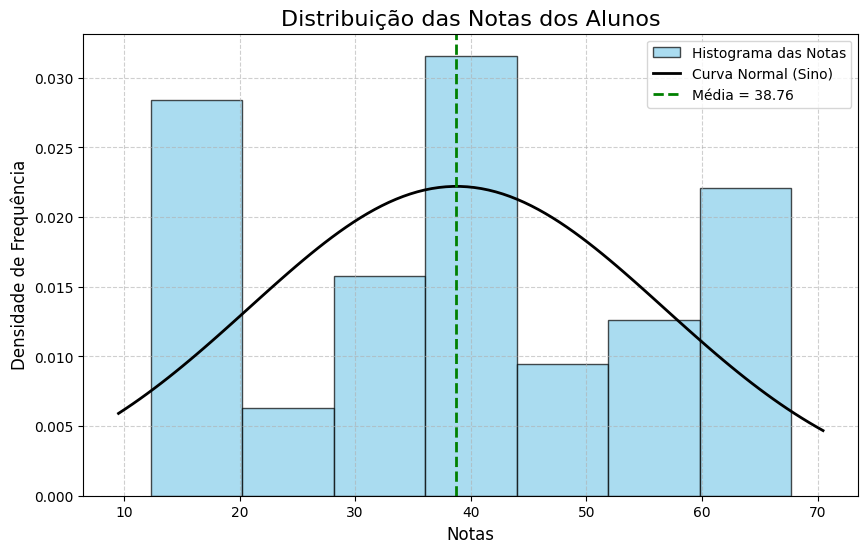

In [5]:
# --- Passo 2: Ler o arquivo CSV e extrair os dados ---
try:
    # Use o pandas para ler o arquivo CSV
    df = pd.read_csv('p1.csv')

    # Extrai a coluna de notas para uma variável.
    # IMPORTANTE: Mude 'Nota' se o nome da sua coluna for diferente.
    notas = df['Nota']

    # --- Passo 3: Calcular a Média e o Desvio Padrão ---
    media = notas.mean()
    desvio_padrao = notas.std()

    print(f"\nAnálise das Notas:")
    print(f"Média (μ): {media:.2f}")
    print(f"Desvio Padrão (σ): {desvio_padrao:.2f}")


    # --- Passo 4: Criar o Gráfico (Histograma e Curva de Sino) ---

    # Cria a figura e os eixos para o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plota o Histograma
    # O parâmetro 'density=True' normaliza o histograma, permitindo que a
    # área total das barras seja 1. Isso é essencial para sobrepor a curva de densidade.
    ax.hist(notas, bins='auto', density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Histograma das Notas')

    # Cria a Curva de Sino (Distribuição Normal)
    # Gera uma sequência de pontos no eixo X para desenhar a curva
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Calcula a probabilidade de cada ponto usando a função de densidade de probabilidade (pdf)
    p = stats.norm.pdf(x, media, desvio_padrao)

    # Plota a curva
    ax.plot(x, p, 'k', linewidth=2, label='Curva Normal (Sino)')

    # --- Passo 5: Customizar e Exibir o Gráfico ---

    # Adiciona uma linha vertical para marcar a média
    ax.axvline(media, color='green', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')

    # Adiciona títulos e rótulos
    title = "Distribuição das Notas dos Alunos"
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Notas', fontsize=12)
    ax.set_ylabel('Densidade de Frequência', fontsize=12)
    
    # Adiciona a legenda para identificar os elementos do gráfico
    ax.legend()
    
    # Adiciona um grid para melhor visualização
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Exibe o gráfico
    plt.show()

except FileNotFoundError:
    print("\nErro: O arquivo 'p1.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o script ou forneça o caminho completo.")
except KeyError:
    print("\nErro: A coluna 'Nota' não foi encontrada no arquivo CSV.")
    print("Por favor, verifique se o nome da coluna no seu arquivo CSV está correto.")